In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df_bronz = pd.read_csv('../data/bronze/train.csv')

In [3]:
#preprocessing data
df_silver = df_bronz.drop(columns=['description','uid'])
city_dum = pd.get_dummies(df_silver['city'], prefix='city')
hometype_dum = pd.get_dummies(df_silver['homeType'], prefix='home')
df_silver = df_silver.join(city_dum).join(hometype_dum).drop(columns=['city','homeType'])

le = LabelEncoder()
df_silver['target'] = le.fit_transform(df_silver['priceRange'])

In [4]:
df_silver[['priceRange','target']].value_counts().reset_index(name='count')

,priceRange,target,count
0,250000-350000,1,2356
1,350000-450000,2,2301
2,450000-650000,3,2275
3,650000+,4,1819
4,0-250000,0,1249


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_silver.drop(columns=['priceRange','target']), df_silver['target'], test_size=0.2, stratify=df_silver['target'])

## XGBoost Model (all variables preselected)

In [6]:
xgb_model = XGBClassifier(objective='multi:softmax', random_state=7, )

params_xgb = {

    "max_depth":[5,6,7], # default 6
}
#scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score),"precision":"precision"}

In [7]:
search = GridSearchCV(xgb_model, param_grid=params_xgb, scoring='accuracy', n_jobs=10, verbose=True)
search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softmax', ...),
             n_jobs=10, param_grid={'max_depth': [5, 6, 7]}, scoring='accuracy',
             verbose=True)

In [8]:
# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", search.best_params_)
print("Best score: ", search.best_score_)

Best set of hyperparameters:  {'max_depth': 5}
Best score:  0.614625


### Predictions and evaluation

In [9]:
y_hat = search.predict(X_test)

In [10]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.70      0.54      0.61       250
           1       0.55      0.61      0.58       471
           2       0.51      0.49      0.50       460
           3       0.62      0.64      0.63       455
           4       0.80      0.82      0.81       364

    accuracy                           0.62      2000
   macro avg       0.64      0.62      0.63      2000
weighted avg       0.62      0.62      0.62      2000



## Model without city and homeType variables

In [11]:
#preprocessing data
df_silver_2 = df_bronz.drop(columns=['description','uid','city','homeType'])
le = LabelEncoder()
df_silver_2['target'] = le.fit_transform(df_silver_2['priceRange'])

In [12]:
df_silver_2[['priceRange','target']].value_counts().reset_index(name='count')

,priceRange,target,count
0,250000-350000,1,2356
1,350000-450000,2,2301
2,450000-650000,3,2275
3,650000+,4,1819
4,0-250000,0,1249


In [13]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_silver_2.drop(columns=['priceRange','target']), df_silver_2['target'], test_size=0.2, stratify=df_silver['target'])

In [14]:
search2 = GridSearchCV(xgb_model, param_grid=params_xgb, scoring='accuracy', n_jobs=10, verbose=True)
search2.fit(X_train_2, y_train_2)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softmax', ...),
             n_jobs=10, param_grid={'max_depth': [5, 6, 7]}, scoring='accuracy',
             verbose=True)

In [15]:
y_hat_2 = search2.predict(X_test_2)

In [16]:
print(classification_report(y_test_2, y_hat_2))

              precision    recall  f1-score   support

           0       0.66      0.54      0.59       250
           1       0.59      0.60      0.59       471
           2       0.55      0.52      0.53       460
           3       0.61      0.68      0.64       455
           4       0.79      0.80      0.79       364

    accuracy                           0.63      2000
   macro avg       0.64      0.63      0.63      2000
weighted avg       0.63      0.63      0.63      2000



### SVC

In [17]:
from sklearn.svm import SVC

In [18]:
svc_model = SVC(gamma='auto',probability=True)#
svc_model.fit(X_train_2,y_train_2)

SVC(gamma='auto', probability=True)

In [19]:
y_hat_3 = svc_model.predict(X_test_2)

In [20]:
print(classification_report(y_test_2, y_hat_3))

              precision    recall  f1-score   support

           0       0.49      0.19      0.28       250
           1       0.39      0.40      0.40       471
           2       0.27      0.48      0.35       460
           3       0.37      0.36      0.36       455
           4       0.52      0.24      0.33       364

    accuracy                           0.36      2000
   macro avg       0.41      0.34      0.34      2000
weighted avg       0.40      0.36      0.35      2000



## Feature Importance

In [21]:
import matplotlib.pylab as pl
from xgboost import plot_importance
from sklearn.inspection import permutation_importance

In [22]:
xg_model = search2.best_estimator_ #select the best model

## XGB Classifier

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

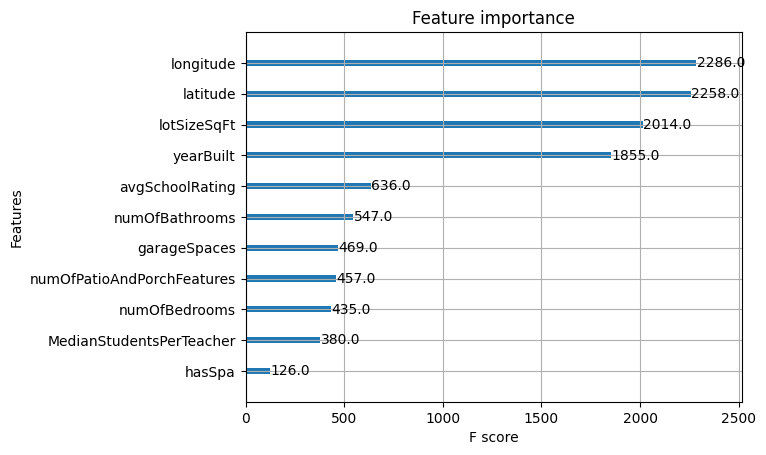

In [23]:
plot_importance(xg_model, )

## SVC Importance

In [24]:
perm_importance = permutation_importance(svc_model, X_test_2, y_test_2)

Text(0.5, 0, 'Permutation Importance')

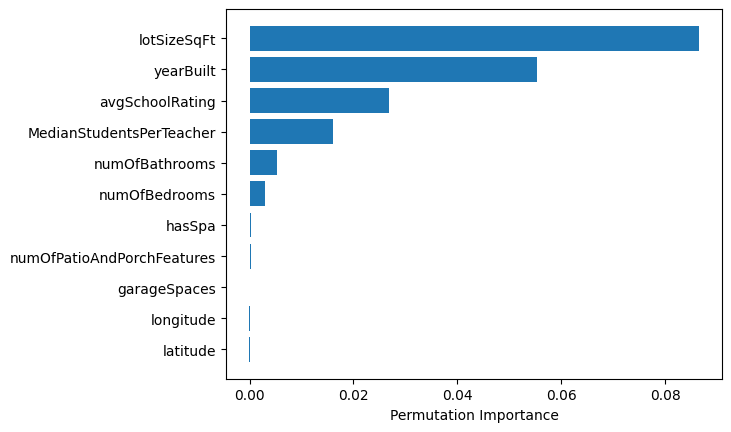

In [26]:
feature_names = svc_model.feature_names_in_
sorted_idx = perm_importance.importances_mean.argsort()
pl.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
pl.xlabel("Permutation Importance")

In [24]:
# # explain all the predictions in the test set
# explainer = shap.KernelExplainer(svc_model.predict_proba, shap.sample(X_train_2,100))
# shap_values = explainer.shap_values(X_test_2)
# shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_2)

  0%|          | 0/2000 [00:00<?, ?it/s]